#### Задача №2.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [108]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
data = pd.read_csv('states_all.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

# Обработка пропусков в данных для количественного признака

Рассмотрим количественные признаки

In [137]:
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 173, 10.09%.
Колонка GRADES_KG_G. Тип данных float64. Количес

Выберем колонку GRADES_KG_G, в которой меньше 5% пропущенных значений.

In [113]:
feature = 'GRADES_KG_G'

In [114]:
round(data[data[feature].isnull()].shape[0] / data.shape[0] * 100.0, 2)

4.84

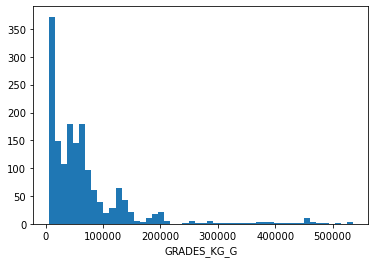

In [115]:
plt.hist(data[feature], 50)
plt.xlabel(feature)
plt.show()

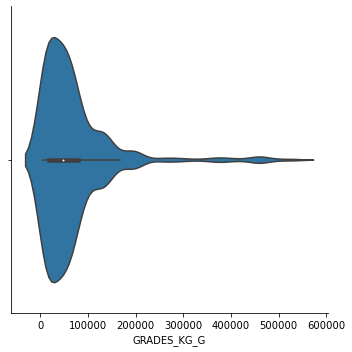

In [116]:
sns.catplot(x=feature, data=data, kind="violin")

In [117]:
data[[feature]].describe()

,GRADES_KG_G
count,1632.000000
mean,68810.962010
std,80671.033008
min,5122.000000
25%,19029.750000
50%,48122.000000
75%,78864.250000
max,535379.000000


In [118]:
data[feature].mean(), data[feature].median(), data[feature].mode()

(68810.96200980392,
 48122.0,
 0       6579.0
 1       6891.0
 2       7469.0
 3       8025.0
 4       9075.0
 5       9273.0
 6      10069.0
 7      10116.0
 8      10409.0
 9      10451.0
 10     10559.0
 11     22282.0
 12     23411.0
 13     23723.0
 14     35715.0
 15     47591.0
 16     50378.0
 17     67051.0
 18    459771.0
 dtype: float64)

Рассмотрим разные способы заполнения пропусков в признаке.

In [119]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    plt.hist(data_num_imp, 50)
    plt.xlabel(feature)
    plt.show()
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1], data_num_imp.mean()

In [120]:
strategies=['mean', 'median', 'most_frequent']

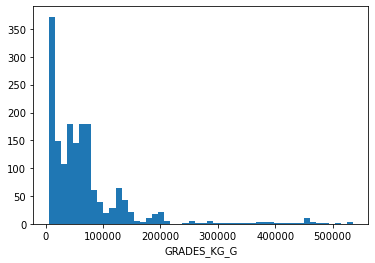

('GRADES_KG_G',
 'mean',
 83,
 68810.96200980392,
 68810.96200980392,
 68810.96200980392)

In [121]:
test_num_impute_col(data, feature, strategies[0])

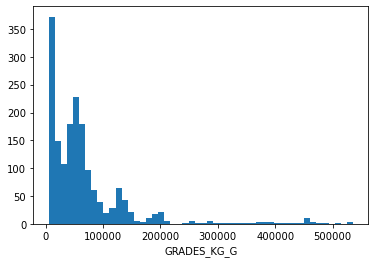

('GRADES_KG_G', 'median', 83, 48122.0, 48122.0, 67809.6886297376)

In [122]:
test_num_impute_col(data, feature, strategies[1])

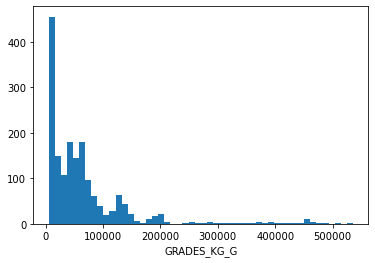

('GRADES_KG_G', 'most_frequent', 83, 6579.0, 6579.0, 65799.1527696793)

In [123]:
test_num_impute_col(data, feature, strategies[2])

Распределение не одномодальное, присутствуют выбросы в значениях справа, так что заполним пустые поля значением медианы.

In [124]:
data[[feature]] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(data[[feature]])

In [126]:
data[[feature]].describe()

,GRADES_KG_G
count,1715.000000
mean,67809.688630
std,78818.783078
min,5122.000000
25%,20944.000000
50%,48122.000000
75%,75726.000000
max,535379.000000


In [127]:
data[feature].mean(), data[feature].median(), data[feature].mode()

(67809.6886297376,
 48122.0,
 0    48122.0
 dtype: float64)

# Обработка пропусков в данных для категориального признака

Рассмотрим категориальные признаки

In [128]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Пропусков в категориальных признаках нет, так что для примера создадим новый признак.

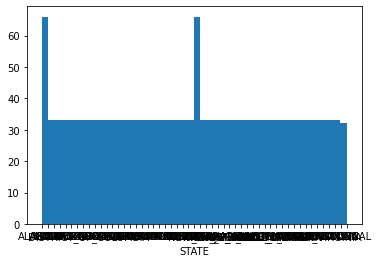

In [89]:
plt.hist(data['STATE'], 50)
plt.xlabel('STATE')
plt.show()

In [129]:
data['BAD_STATE'] = [data['STATE'][i] if i % 10 != 0 else np.nan for i in range(len(data['STATE']))]

In [130]:
round(data[data['BAD_STATE'].isnull()].shape[0] / data.shape[0] * 100.0, 2)

10.03

Заполним пропуски константой 'NA'. Данные по странам распределены довольно равномерно, и наиболее частое значение вряд ли действительно будет подходить. Лучше пусть модель знает, что данных о стране у нас нет.

In [131]:
data[['BAD_STATE']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA').fit_transform(data[['BAD_STATE']])

In [132]:
data['BAD_STATE'].isnull().sum()

0

Видим, что все пропуски заполнены.

# Дальнейшее построение моделей машинного обучения

Для дальнейшего построения моделей машинного обучения в идеале стоит удалить признаки, процент пропусков в которых больше 5% то есть ENROLL (28.63%), TOTAL_REVENUE (25.66%) и т. д. Хотя таких признаков здесь слишком много, так что стоит учитывать их корреляцию с целевым признаком, и наиболее ценные постраться заполнить при 20-30%.

Также довольно много пропупущенных значений в потенциально целевых признаках AVG_READING_8_SCORE (67.23%), AVG_READING_4_SCORE (62.1%) и т. д. Как-либо заполнять пропуски при таком их количестве чревато, это будет уже выдумка, но удалять целевой признак тоже нельзя. Возможно, лучше всего будет удалить строки с пропущенным целевым признаком. 

In [133]:
data_new_2 = data.dropna(axis=0, subset=['AVG_READING_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], how='any')
(data.shape, data_new_2.shape)

((1715, 26), (562, 26))